## Analysis Challenge Assignment 4
### Author: Ming Chen

### Introduction  

For ACA4, I decided to define a network of characters from a TV anime series: JoJo's Bizarre Adventure: Golden Wind. The series is 39 episodes long, and follows the adventrues of Giorno Giovanna, who joins the criminal organization Passione in the hopes of becoming a gangster and taking control of the organization in the name of reform.

I expect that the network can describe the main relationships of main characters, so I took notes of the numbers of times of two characters that appear together in different scenes. (For example, A and B appear in a scene together and interact with each other, then it counts one.)
Then, the nodes of the network are the names of characters, the edges are the frequencies of two characters appearing together.

I plan to analyze the network in 4 steps:  

1.Visualize the basic information of the network (glance over the network)  
2.Describe vertices (find important nodes by using degree)  
3.Detect communities   
4.Visualize further information (demonstrate the sizes of nodes and widths of edges)

### 1. Visualize the network

In [1]:
import os
os.chdir('D:\\Learning\\CU\\Courses\\EDM\\ACA4')
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

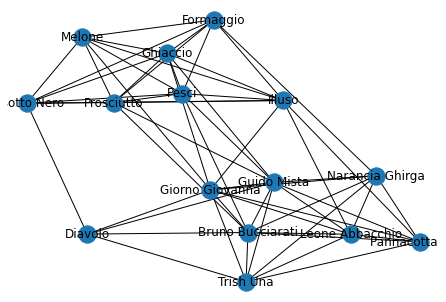

In [2]:
SNAdata=pd.read_csv("GDData.csv",index_col=0)
G=nx.Graph(SNAdata)
nx.draw(G,with_labels=True)

#### analyses    
There are 15 main characters selected from the series.  
As the network showed above, it seems that they are diveded into 3 parts. The guardian team (led by Bucciarati), the hitman team (led by Risotto) and the Boss (Diavolo). The goal of the guardian team is to kill the boss, and the hitman team is sent to defeat them.  
It is clear that the edges are much more complex within each team, which indicate the close relationships within each team.

### 2. Descirbe vertices

#### 2.1 density

In [3]:
density=nx.density(G)
print('The edge density is: %.3f'%(density))

The edge density is: 0.552


#### 2.2 degree centrality

In [4]:
degree=nx.degree(G)
pd.DataFrame(degree)

,0,1
0,Giorno Giovanna,10
1,Bruno Bucciarati,9
2,Leone Abbacchio,7
3,Guido Mista,10
4,Narancia Ghirga,7
5,Pannacotta Fugo,7
6,Trish Una,7
7,Diavolo,5
8,Risotto Nero,7
9,Formaggio,7


#### 2.3 closeness centrality

In [5]:
close=nx.closeness_centrality(G)
pd.DataFrame.from_dict(close,orient='index')

,0
Giorno Giovanna,0.777778
Bruno Bucciarati,0.736842
Leone Abbacchio,0.666667
Guido Mista,0.777778
Narancia Ghirga,0.666667
Pannacotta Fugo,0.666667
Trish Una,0.666667
Diavolo,0.608696
Risotto Nero,0.666667
Formaggio,0.666667


#### 2.4 betweenness centrality

In [6]:
between=nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between,orient='index')

,0
Giorno Giovanna,0.086447
Bruno Bucciarati,0.052930
Leone Abbacchio,0.010440
Guido Mista,0.075824
Narancia Ghirga,0.031136
Pannacotta Fugo,0.010440
Trish Una,0.008242
Diavolo,0.020147
Risotto Nero,0.032967
Formaggio,0.030220


#### analyses    
  
The density of the network is great, all the nodes (characters) are well-connected. It seems that the scenes (plots) are well designed so that the relationships among all the characters are demonstrated clearly.  
  
Giorno and Mista have the highest degree centralities and closeness centrality of the network, which makes sense, because the two characters appear early in the story, and survive to the end (Also, Giorno is the leading role, and Mista partners with him many times in the story. So, the two characters have chances to build a lot of connections with other characters, which makes them important in the network.  
  
Giorno again has the highest betweenness centrality in the network. As the leading role of the story, Giorno takds part in almost every scene in the story, and also attracts attention from both friends and enemies. It is clear that he is the center of the story, and also the center of the relationship network.

### 3. Detect communities

In [7]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
c=list(greedy_modularity_communities(G))
print(len(c))

2


In [8]:
community_0=sorted(c[0])
community_1=sorted(c[1])

print(community_0)
print(community_1)

['Bruno Bucciarati', 'Diavolo', 'Giorno Giovanna', 'Guido Mista', 'Leone Abbacchio', 'Narancia Ghirga', 'Pannacotta Fugo', 'Trish Una']
['Formaggio', 'Ghiaccio', 'Illuso', 'Melone', 'Pesci', 'Prosciutto', 'Risotto Nero']


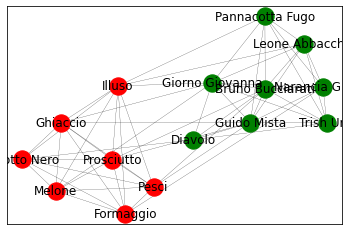

In [9]:
np.random.seed(123)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos=pos,nodelist=community_0,node_color='green',label=True)
nx.draw_networkx_nodes(G,pos=pos,nodelist=community_1,node_color='red',label=True)
nx.draw_networkx_edges(G,pos=pos,width=0.2)
nx.draw_networkx_labels(G,pos=pos)
plt.show()

#### analyses  
I assumed that there would be 3 community (according to the story), but actually it detects only two. It's also a little bit ridiculous, as Diavolo (the villian of the story) is classified as a member of the guardian team. The 'mistake' may attribute to the way I counted, and the meaning of the edges. The edge does not have any positive/negative meaning, it only shows how frequently two characters interact (in the story). Because Diavolo is a mysterious Boss who never show his face to Passione's memebers, he has little interactions with the hitman team. On the contray, in the latter part of the story, Diavolo fights with the guardian team, which causes the 'close' relationship.

### 4. Visualize further information

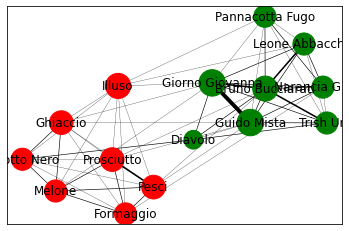

In [10]:
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}
eWeight=nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G,pos=pos,nodelist=community_0,node_color='green',node_size=[v*70 for v in community_0_degree.values()],label=True)
nx.draw_networkx_nodes(G,pos=pos,nodelist=community_1,node_color='red',node_size=[v*70 for v in community_1_degree.values()],label=True)
nx.draw_networkx_edges(G,pos,width=[2.5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G,pos=pos)
plt.show()

#### analyses    
The sizes of the nodes demonstrate the relatively important role in each team. Because everyone (except Diavolo) knows their teammember, the sizes of the nodes actually mean the numbers of enemies they fight with in the story, the larger the node, the more enemy they encounter (then build the relationship).  
The widths of the edges can to some degree show the closeness of different relationships. As shown in the network, Bucciarati has the relatively strong relationships with many memebers in the guardian team, which reveals his teamleader identity. Giorno and Mista partners with each other many times, and they are only two of the gaurdian team who survive at the end, so their relationship is strong of course. Pesci and Prosciutto are like foster brothers, they are always partners and Pesci really admires Prosciutto, so it also makes sense that the network demonstrates a close relationship of them.